In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,transpile
from qiskit.circuit.library import GroverOperator
from qiskit_aer import AerSimulator

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_3_puzzle_circuit():
    """Create the quantum circuit for solving the 3-puzzle problem using Grover's algorithm."""
    # Initialize quantum and classical registers
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initial state |000>
    # CNOT gates to exchange positions of qubits
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])

    # Apply Hadamard gates to create superposition
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])

    # Placeholder for Grover's algorithm
    # This requires defining an oracle and the Grover operator
    # Here we use a simple placeholder to illustrate the concept
    oracle = QuantumCircuit(3)
    oracle.z(0)  # Example oracle condition (adjust based on the puzzle's rules)
    oracle_gate = oracle.to_gate(label="Oracle")

    # Grover operator
    grover_operator = GroverOperator(oracle)
    qc.append(grover_operator, qr)

    # Measurement
    qc.measure(qr, cr)
    return qc

In [ ]:
# Create the 3-puzzle quantum circuit
qc = create_3_puzzle_circuit()

# Execute the circuit on a quantum simulator
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)

job = simulator.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Output the result
print("Measurement results from the 3-puzzle quantum circuit:")
print(counts)

Measurement results from the 3-puzzle quantum circuit:
{'001': 127, '110': 127, '011': 104, '111': 138, '101': 130, '100': 129, '010': 119, '000': 150}


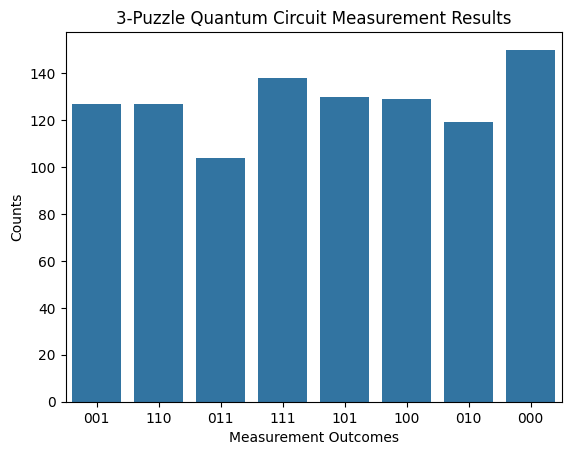

In [ ]:
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Measurement Outcomes')
plt.ylabel('Counts')
plt.title('3-Puzzle Quantum Circuit Measurement Results')
plt.show()